In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fro sklearn.datasets import load_diabetes

In [3]:
dataset = load_diabetes()

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
df_diabetes = pd.DataFrame(dataset.data,columns = ['age',
                                                   'sex',
                                                   'bmi',
                                                   'bp',
                                                   's1',
                                                   's2',
                                                   's3',
                                                   's4',
                                                   's5',
                                                   's6'])

In [7]:
X= df_diabetes
y = dataset['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [9]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
# correlation 
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268422,0.281806
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113187,0.165951
bmi,0.184695,0.033934,1.000000,0.394309,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
bp,0.314569,0.179283,0.394309,1.000000,0.239978,0.161457,-0.120827,0.212785,0.375295,0.374647
s1,0.270283,0.021069,0.266467,0.239978,1.000000,0.891063,0.053003,0.546840,0.528543,0.330773
s2,0.218952,0.120205,0.261560,0.161457,0.891063,1.000000,-0.190658,0.654675,0.307139,0.293291
s3,-0.043783,-0.355094,-0.354655,-0.120827,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
s4,0.180038,0.320490,0.430974,0.212785,0.546840,0.654675,-0.736685,1.000000,0.613472,0.431352
s5,0.268422,0.113187,0.468473,0.375295,0.528543,0.307139,-0.372437,0.613472,1.000000,0.478967
s6,0.281806,0.165951,0.404928,0.374647,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000


<Axes: >

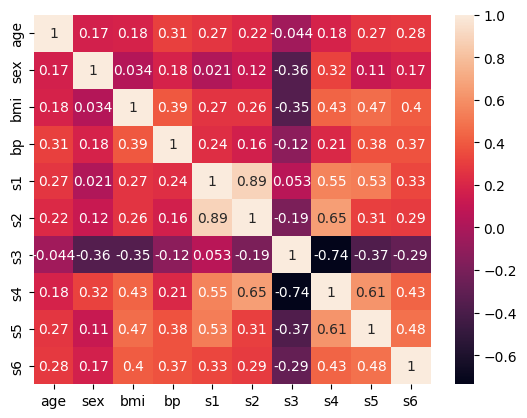

In [11]:
sns.heatmap(X_train.corr(),annot=True)

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [14]:
regressor.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [15]:
y_pred = regressor.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 54.247191011235955


In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.09509677443951936


In [20]:
import numpy as np
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape, "%")

MAPE: 44.72818704959171 %


# Hyper parameter tuning


In [21]:
param = {
    'criterion': ['squared_error','friedman_mse','absolute_error'],   
    'splitter' : ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,25],
    'max_features' : ['auto','sqrt','log2']
}

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [24]:
grid = GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
grid.fit(X_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [27]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [28]:
y_pred = grid.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 47.55837458342768


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.3961147200366111


In [31]:
from sklearn.metrics import mean_squared_error

# y_test = actual values
# y_pred = predicted values
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3199.4758519414668
